In [ ]:
### SentinelNet-AI-Powered Network Intrusion Detection System (NIDS)
#SentinelNet-AI is an AI-powered Network Intrusion Detection System that uses machine learning to classify network traffic as normal or malicious, helping identify potential cyber-attacks in real time.


In [ ]:
#1.Dataset Acquisition and Exploration
#Dataset used is CICIDS2017 Dataset(Wednesday subset) - https://www.unb.ca/cic/datasets/ids-2017.html

In [ ]:
#import required libraries
import pandas as pd #for data manipulation

In [ ]:
#Load dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/SentinelNet/Wednesday-workingHours.pcap_ISCX.csv"
df = pd.read_csv(file_path, low_memory=False)
print("dataset loaded")

Mounted at /content/drive
dataset loaded


In [ ]:
#dataset shape and preview - display first few rows & check its dimension to get a sense of data structure, no. of columns, and record count.
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (692703, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
#Get column name
print("columns:")
df.columns.tolist()

columns:


[' Destination Port',
 ' Flow Duration',
 ' Total Fwd Packets',
 ' Total Backward Packets',
 'Total Length of Fwd Packets',
 ' Total Length of Bwd Packets',
 ' Fwd Packet Length Max',
 ' Fwd Packet Length Min',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 'Bwd Packet Length Max',
 ' Bwd Packet Length Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 'Flow Bytes/s',
 ' Flow Packets/s',
 ' Flow IAT Mean',
 ' Flow IAT Std',
 ' Flow IAT Max',
 ' Flow IAT Min',
 'Fwd IAT Total',
 ' Fwd IAT Mean',
 ' Fwd IAT Std',
 ' Fwd IAT Max',
 ' Fwd IAT Min',
 'Bwd IAT Total',
 ' Bwd IAT Mean',
 ' Bwd IAT Std',
 ' Bwd IAT Max',
 ' Bwd IAT Min',
 'Fwd PSH Flags',
 ' Bwd PSH Flags',
 ' Fwd URG Flags',
 ' Bwd URG Flags',
 ' Fwd Header Length',
 ' Bwd Header Length',
 'Fwd Packets/s',
 ' Bwd Packets/s',
 ' Min Packet Length',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 'FIN Flag Count',
 ' SYN Flag Count',
 ' RST Flag Count',
 ' P

In [ ]:
#datatypes check
print("Column data types:")
print(df.dtypes)
print(df.dtypes.value_counts())

Column data types:
 Destination Port                int64
 Flow Duration                   int64
 Total Fwd Packets               int64
 Total Backward Packets          int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
 Idle Std                      float64
 Idle Max                        int64
 Idle Min                        int64
 Label                          object
Length: 79, dtype: object
int64      54
float64    24
object      1
Name: count, dtype: int64


In [ ]:
#basic info summary - checking column data types, non-null counts, and memory usage to understand the structure of the dataset and detect inconsistencies.
print("Basic info summary:")
print(df.info())

Basic info summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             692703 non-null  int64  
 1    Flow Duration                692703 non-null  int64  
 2    Total Fwd Packets            692703 non-null  int64  
 3    Total Backward Packets       692703 non-null  int64  
 4   Total Length of Fwd Packets   692703 non-null  int64  
 5    Total Length of Bwd Packets  692703 non-null  int64  
 6    Fwd Packet Length Max        692703 non-null  int64  
 7    Fwd Packet Length Min        692703 non-null  int64  
 8    Fwd Packet Length Mean       692703 non-null  float64
 9    Fwd Packet Length Std        692703 non-null  float64
 10  Bwd Packet Length Max         692703 non-null  int64  
 11   Bwd Packet Length Min        692703 non-null  int64  
 12   Bwd Packet Length Mean 

In [ ]:
#basic statistics - includes statistical measures like mean,median,standard deviation,min,and max for numerical columns.
print("Basic statistics:")
print(df.describe())


Basic statistics:
        Destination Port   Flow Duration   Total Fwd Packets  \
count      692703.000000    6.927030e+05       692703.000000   
mean         5686.869462    2.800168e+07            9.556261   
std         15727.423560    4.276680e+07          747.197814   
min             0.000000   -1.000000e+00            1.000000   
25%            53.000000    2.010000e+02            2.000000   
50%            80.000000    6.143700e+04            2.000000   
75%           443.000000    8.302437e+07            7.000000   
max         65487.000000    1.200000e+08       203943.000000   

        Total Backward Packets  Total Length of Fwd Packets  \
count            692703.000000                 6.927030e+05   
mean                 10.214079                 5.550930e+02   
std                 984.204633                 6.163663e+03   
min                   0.000000                 0.000000e+00   
25%                   1.000000                 1.200000e+01   
50%                   2.000

In [ ]:
#labels and count in each
df[' Label'].value_counts()

,count
Label,
BENIGN,440031
DoS Hulk,231073
DoS GoldenEye,10293
DoS slowloris,5796
DoS Slowhttptest,5499
Heartbleed,11


In [ ]:
'''
Observations from Data Exploration
- Dataset contains both normal and attack traffic.
- Dataset is large with many correlated numerical features.
- Only 1 categorical feature - 'Label'
- This understanding helps define cleaning and preprocessing steps.
'''

In [ ]:
#identifying missing values to identify incomplete data that may affect model accuracy
missing_before = df.isnull().sum()
print("Missing values:")
print(missing_before[missing_before > 0])
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage[missing_percentage > 0])

Missing values:
Flow Bytes/s    1008
dtype: int64
Flow Bytes/s    0.145517
dtype: float64


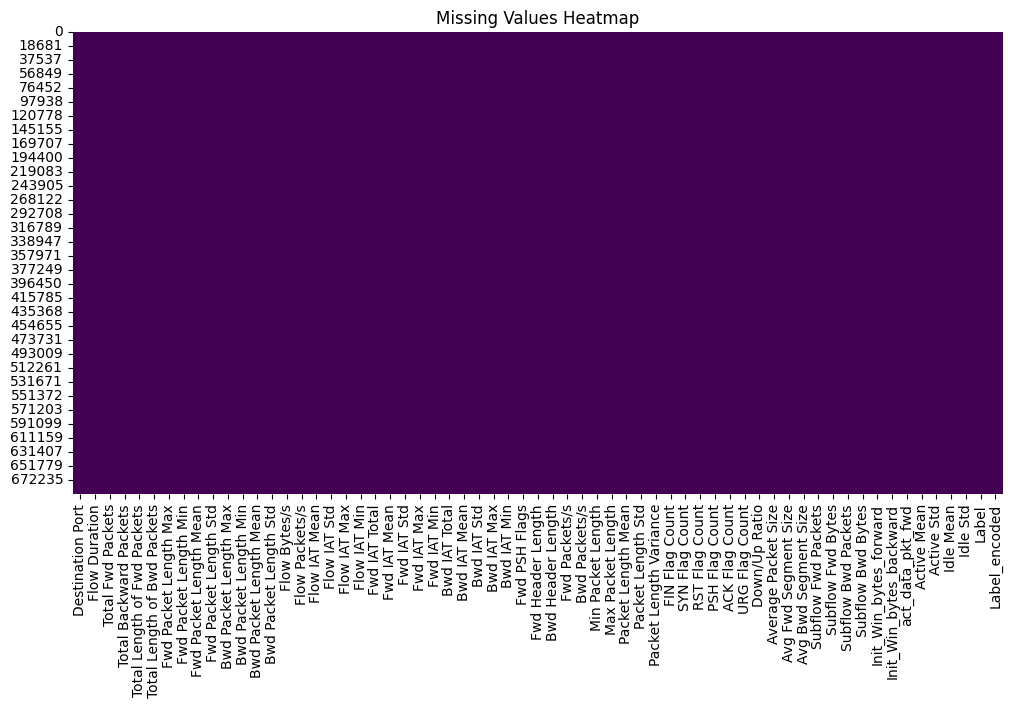

In [ ]:
#visualize missing value
import seaborn as sns
import matplotlib.pyplot as plt
# Heatmap to visualize missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
df['Flow Bytes/s'].isna().value_counts().plot(kind='bar')


In [ ]:
#2. Data Cleaning and Preprocessing

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: Index([' Label'], dtype='object')
Numerical columns: Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Pack

In [ ]:
import numpy as np

# replace inf and -inf with NaN
df[numerical_cols] = df[numerical_cols].replace([np.inf, -np.inf], np.nan)

In [ ]:
#Impute NaN values with median
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# Verify
print("Missing values after handling:")
print(df[numerical_cols].isnull().sum())

Missing values after handling:
 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
 Active Min                    0
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
Length: 78, dtype: int64


In [ ]:
#handle duplicate rows to avoid data bias
print("Number of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()
print("After dropping duplicates:", df.shape)

Number of duplicate rows: 81909
After dropping duplicates: (610794, 79)


In [ ]:
#' Destination Port', ' Flow Duration', ' Total Fwd Packets',etc contain leading/tailing spaces, make them hard to us.
# So strip extra spaces in column names to prevent error later
df.columns = df.columns.str.strip()

In [ ]:
#handling irrelevant features
irrelevant_cols = [
    'Fwd Header Length.1',
    'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
    'CWE Flag Count', 'ECE Flag Count',
    'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
    'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate',
    'min_seg_size_forward',
    'Active Max', 'Active Min', 'Idle Max', 'Idle Min'
]
df = df.drop(columns=irrelevant_cols, errors='ignore')
print("Number of columns after remmoving irrelevant cols:", len(df.columns))
print("Columns:")
print(df.columns.tolist())

Number of columns after remmoving irrelevant cols: 62
Columns:
['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'Down/Up Ratio', 'Ave

In [ ]:
#save cleaned data
df.to_csv('cleaned_data.csv', index=False)


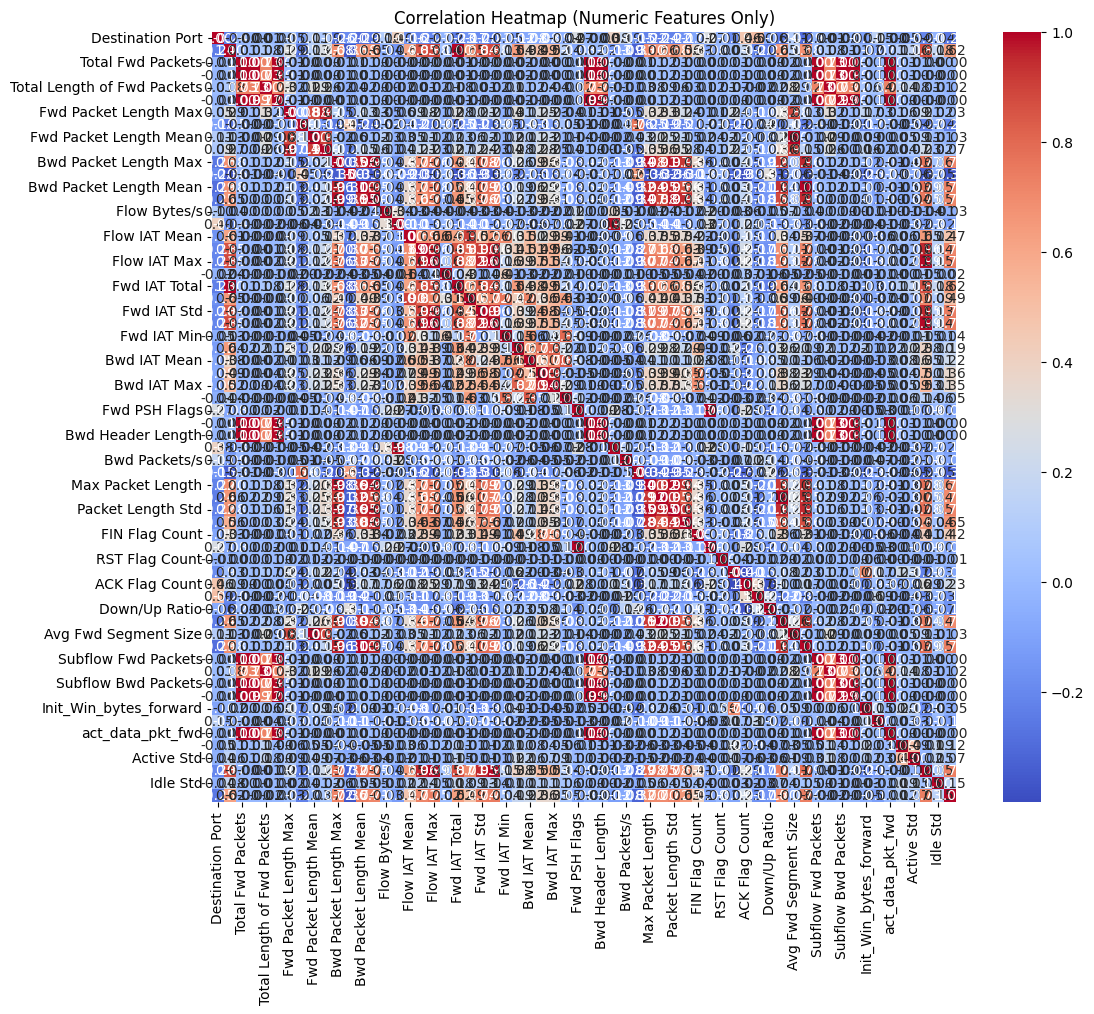

In [ ]:
#Correlation heatmap of numeric features to understand how strongly they are related
#Only numeric columns as df.corr only works with numeric type
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

In [ ]:
#Detect outliers in all numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

# Convert to DataFrame for easier viewing
outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Num_Outliers'])
outlier_df = outlier_df.sort_values(by='Num_Outliers', ascending=False)
print(outlier_df)
total_outliers = outlier_df['Num_Outliers'].sum()
print("\nTotal number of outliers in all numeric columns:", total_outliers)

In [ ]:
Q1 = df['Flow Bytes/s'].quantile(0.25)
Q3 = df['Flow Bytes/s'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Flow Bytes/s'] < lower_bound) | (df['Flow Bytes/s'] > upper_bound)]
print("Number of outliers in Flow Bytes/s:", len(outliers))

In [ ]:
#checking outliers in flowbytes/s
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Flow Bytes/s'])
plt.title("Boxplot of Flow Bytes/s")
plt.show()

In [ ]:
# Find columns where all values are 0
all_zero_cols = df.columns[(df == 0).all()]
print("Columns with all zero values:")
print(all_zero_cols.tolist())


Columns with all zero values:
[]


In [ ]:
#3. Feature Engineering and Selection

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Label_encoded'] = le.fit_transform(df['Label'])
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Encoding Mapping:", label_mapping)


Label Encoding Mapping: {'BENIGN': np.int64(0), 'DoS GoldenEye': np.int64(1), 'DoS Hulk': np.int64(2), 'DoS Slowhttptest': np.int64(3), 'DoS slowloris': np.int64(4), 'Heartbleed': np.int64(5)}


In [ ]:
# Visualize the distribution of Label classes
plt.figure(figsize=(8,5))
sns.countplot(x='Label', data=df)
plt.title("Distribution of Label Classes")
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(df.columns.tolist())


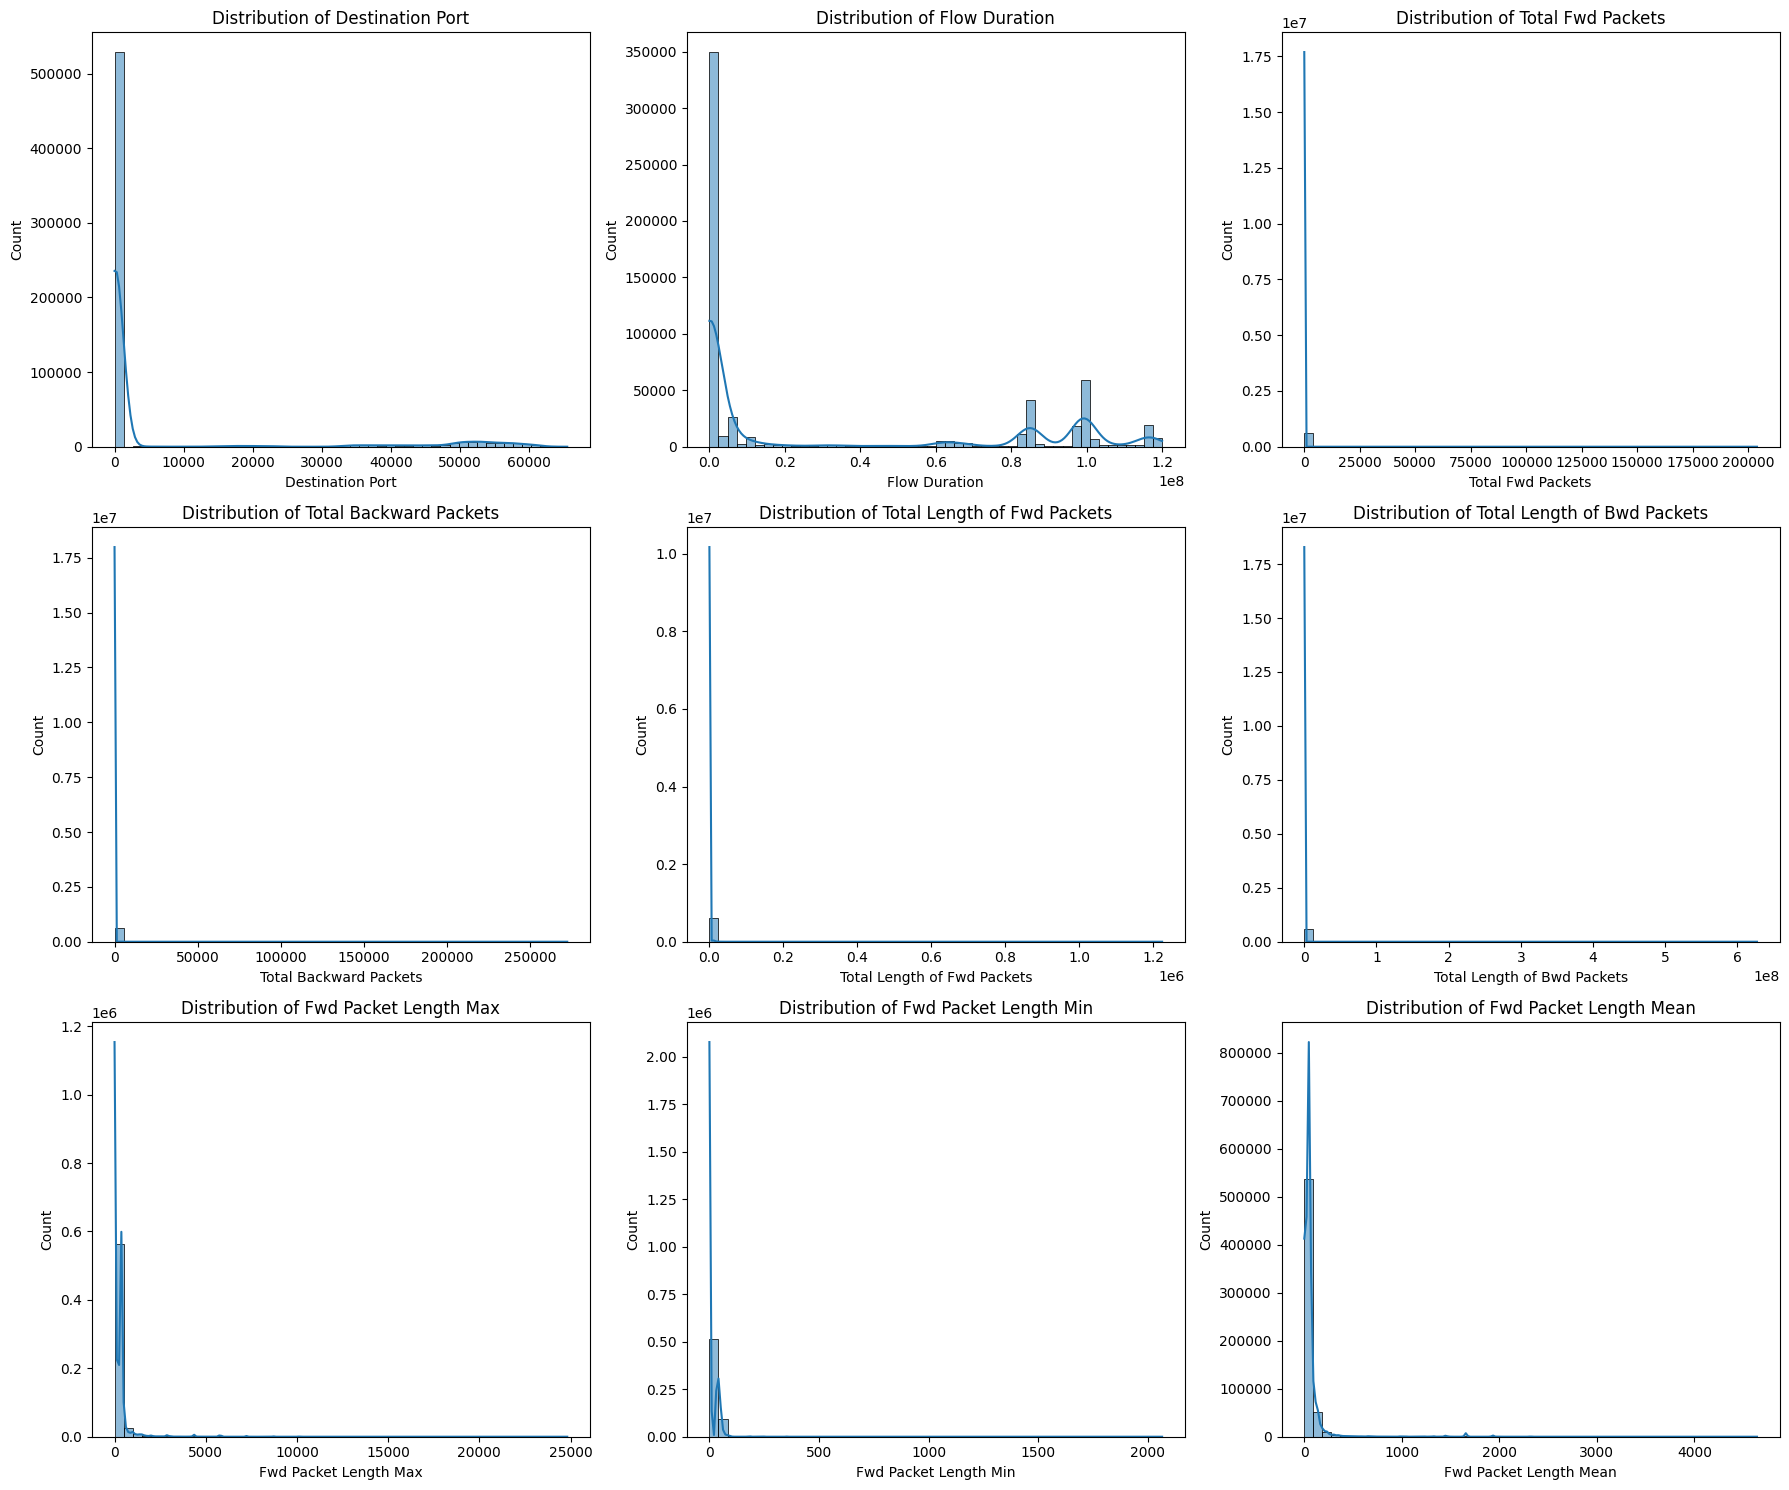

In [ ]:
# Select only numerical columns from your important features
num_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_features = [col for col in num_features if col != 'Label']  # exclude target label

plt.figure(figsize=(18,15))
for i, col in enumerate(num_features[:9], 1):  # visualize first 9 features (to avoid clutter)
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [ ]:
print(df.columns.tolist())


In [ ]:
#save encoded and cleaned dataset
df_encoded = df.drop(columns=['Label']) #since label encoded col exist
df_encoded.to_csv('/content/sentinelnet_encoded.csv', index=False)
print("Encoded dataset saved successfully!")

Encoded dataset saved successfully!


In [ ]:
#load cleaned and encoded dataset
df = pd.read_csv('/content/sentinelnet_encoded.csv')
print("Encoded dataset loaded successfully with shape:", df.shape)

# Separate features and target variable
X = df.drop(columns=['Label_encoded'], errors='ignore')
y = df['Label_encoded']

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)


Encoded dataset loaded successfully with shape: (610794, 62)
Feature matrix shape: (610794, 61)
Target vector shape: (610794,)


In [ ]:
#feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Feature scaling completed successfully!")


Feature scaling completed successfully!


In [ ]:
#applying PCA to reduce no. of dimensions while keeping most of dataset's info
from sklearn.decomposition import PCA

# Keep 95% of total variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Original feature count:", X.shape[1])
print("Reduced feature count after PCA:", X_pca.shape[1])



Original feature count: 61
Reduced feature count after PCA: 21


In [ ]:
#save PCA-transformed dataset
X_pca_df = pd.DataFrame(X_pca)
X_pca_df['Label'] = y.values
X_pca_df.to_csv('/content/sentinelnet_pca.csv', index=False)

print("PCA-transformed dataset saved successfully!")


PCA-transformed dataset saved successfully!


In [ ]:
#splitting dataset into train(70%) and test(30%)
from sklearn.model_selection import train_test_split

# Using scaled data (before PCA) for feature importance
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (427555, 61)
Testing set shape: (183239, 61)
